In [1]:
import sys
!{sys.executable} -m pip install scikit-learn


##hierarchial Clusturing 

In [ ]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [3]:
#loading the data set
data=pd.read_csv('environmental_socioeconomic.csv')
data.head()


,co2_emissions,waste_production,gdp,population
0,218.543053,436.276737,39199.932440,6.417631e+07
1,477.821438,399.620887,17380.479824,4.646995e+07
2,379.397274,258.538521,23865.587775,9.648535e+07
3,319.396318,646.540003,36531.225474,2.267887e+07
4,120.208388,528.961744,29283.573781,5.919779e+07


In [4]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)
print(pd.DataFrame(data_scaled,columns=data.columns).head())

   co2_emissions  waste_production       gdp  population
0      -0.415900         -0.452465  0.801884    0.482494
1       1.587377         -0.593258 -1.100359   -0.136414
2       0.826917         -1.135149 -0.534981    1.611824
3       0.363328          0.355146  0.569224   -0.968007
4      -1.175669         -0.096466 -0.062635    0.308475


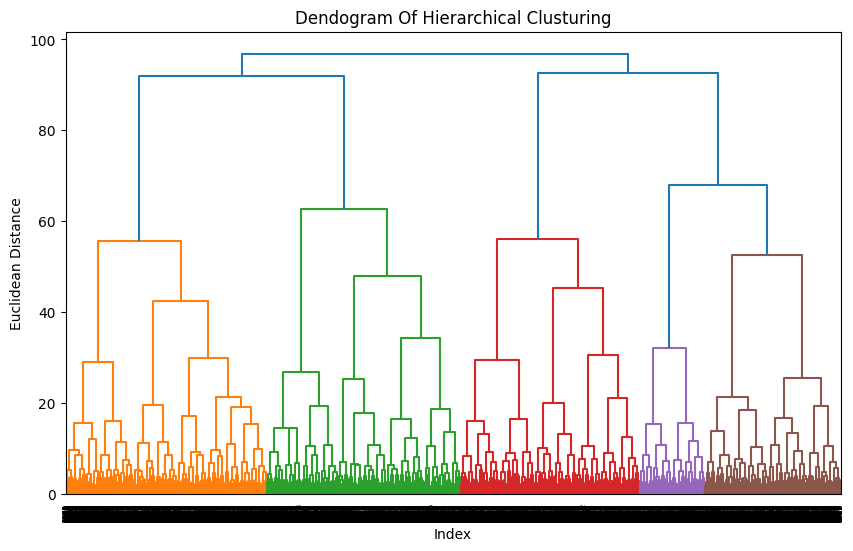

In [5]:
plt.figure(figsize=(10,6))
dendogram=sch.dendrogram(sch.linkage(data_scaled,method='ward'))
plt.xlabel('Index')
plt.ylabel('Euclidean Distance')
plt.title('Dendogram Of Hierarchical Clusturing')
plt.show()

In [6]:
#applying agglomerative Clustirng assuming 7 cluster
hierarchial_clusturing=AgglomerativeClustering(n_clusters=7,linkage='ward')
data['cluster']=hierarchial_clusturing.fit_predict(data_scaled)

In [7]:
print(data.head())

   co2_emissions  waste_production           gdp    population  cluster
0     218.543053        436.276737  39199.932440  6.417631e+07        0
1     477.821438        399.620887  17380.479824  4.646995e+07        3
2     379.397274        258.538521  23865.587775  9.648535e+07        3
3     319.396318        646.540003  36531.225474  2.267887e+07        2
4     120.208388        528.961744  29283.573781  5.919779e+07        5


In [9]:
sil_score=silhouette_score(data_scaled,data['cluster'])
print(f'Silhouette Score:{sil_score}')

Silhouette Score:0.11340626237860431


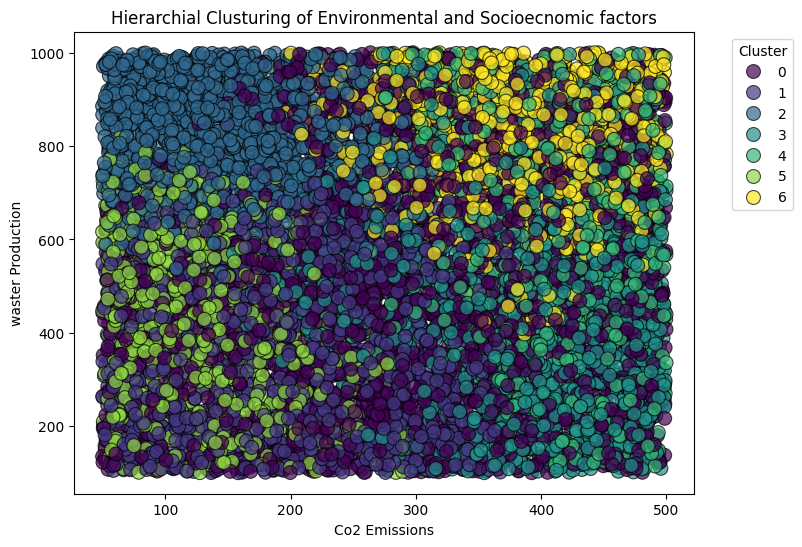

In [12]:
#visualize using Co2 emissions and waste production

plt.figure(figsize=(8,6))
sns.scatterplot(x='co2_emissions',y='waste_production',hue='cluster',data=data,palette='viridis',s=100,alpha=0.7,edgecolor='k')
plt.title('Hierarchial Clusturing of Environmental and Socioecnomic factors')
plt.xlabel('Co2 Emissions')
plt.ylabel('waster Production')
plt.legend(title='Cluster',bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()